# My playing with the Kaggle titanic challenge.

I COPPIED THE INITIAL CODE and got lots of the ideas for this first Kaggle advanture from [here](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/comments).

I will later compact the important stuff from here into a kernal on my Kaggle account.

In [1]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

train_df = pd.read_csv("train.csv",dtype={"Age":np.float64},)

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# find how many ages
train_df['Age'].count()

714

In [4]:
# how many ages are NaN?
train_df['Age'].isnull().sum()

177

Mean age =  29.6792717087


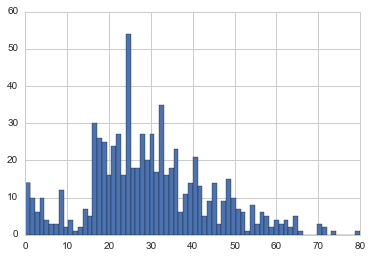

In [5]:
# plot ages of training data set, with NaN's removed
train_df['Age'].dropna().astype(int).hist(bins=70)
print 'Mean age = ',train_df['Age'].dropna().astype(int).mean()

# Let's see where they got on

In [6]:
train_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train_df['Embarked'].isnull().sum()

2

In [9]:
train_df["Embarked"].count()

889

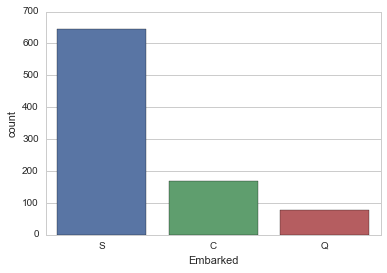

In [10]:
sns.countplot(x="Embarked",data=train_df)

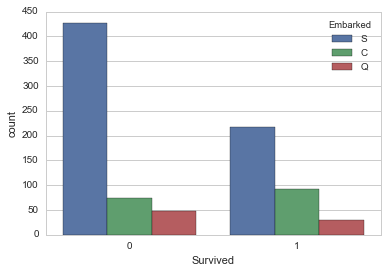

In [11]:
sns.countplot(x='Survived',hue='Embarked',data=train_df,order=[0,1])

## OK, so clearly there were more people who got on at S, and it seems their survival is disproportional.  Let's check that.

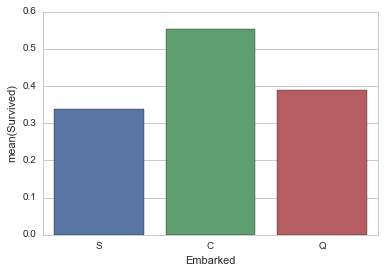

In [12]:
embark_survive_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_survive_perc,order=['S','C','Q'])

## Interesting, actually those from C had higher rate of survival.  So, knowing more people from your home town didn't help.

## Next, did how much they paid have an effect?

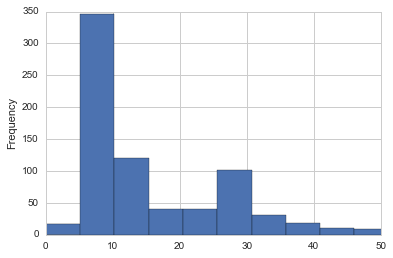

In [13]:
train_df['Fare'].astype(int).plot(kind='hist',bins=100, xlim=(0,50))

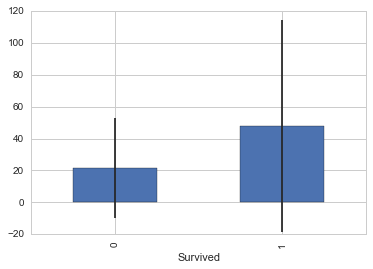

In [14]:
# get fare for survived & didn't survive passengers 
fare_not_survived = train_df["Fare"].astype(int)[train_df["Survived"] == 0]
fare_survived     = train_df["Fare"].astype(int)[train_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

## Before digging into how the ages factor in, let's take the advice of others and replace NaN's with random values

In [15]:
import scipy.stats as stats

# column 'Age' has some NaN values
# A simple approximation of the distribution of ages is a gaussian, but this is not commonly accurate.
# lets make a vector of random ages centered on the mean, with a width of the std
lower, upper = train_df['Age'].min(), train_df['Age'].max()
mu, sigma = train_df["Age"].mean(), train_df["Age"].std()

# number of rows
n = train_df.shape[0]

print 'max: ',train_df['Age'].max()
print 'min: ',train_df['Age'].min()

# vector of random values using the truncated normal distribution.  
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
rands = X.rvs(n)

# get the indexes of the elements in the original array that are NaN
idx = np.isfinite(train_df['Age'])

# use the indexes to replace the NON-NaNs in the random array with the good values from the original array
rands[idx.values] = train_df[idx]['Age'].values

## At this point rands is now the cleaned column of data we wanted, so push it in to the original df
train_df['Age'] = rands

"""
## we will make a new column with Nan's replaced, then push that into the original df
n = train_df.shape[0] # number of rows
#randy = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = n)
# draw from a gaussian instead of simple uniform
# note this uses a 'standard gauss' and that tneeds to have its var and mean shifted
randy = np.random.randn(n)*std_age_train + average_age_train
idx = np.isfinite(train_df['Age']) # gives a boolean index for the NaNs in the df's column
randy[idx.values] = train_df[idx]['Age'].values  ## idexing the values of randy with this
#now have updated column, next push into original df
train_df['Age'] = randy
"""

print 'After this gaussian replacment, there are: ',train_df['Age'].isnull().sum()

print 'max: ',train_df['Age'].max()
print 'min: ',train_df['Age'].min()

max:  80.0
min:  0.42
After this gaussian replacment, there are:  0
max:  80.0
min:  0.42


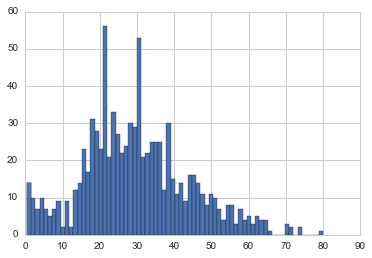

In [16]:
# plot new Age Values
train_df['Age'].hist(bins=70)
# Compare this to that from a few cells up for the raw ages with the NaN's dropped.  Not much different actually.

### lets perform the same NaN replacement for the 'Age' with the test data as well

In [17]:
## let's pull in the test data
test_df = pd.read_csv("test.csv",dtype={"Age":np.float64},)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
#### Do the same for the test data
# column 'Age' has some NaN values
# A simple approximation of the distribution of ages is a gaussian, but this is not commonly accurate.
# lets make a vector of random ages centered on the mean, with a width of the std
lower, upper = test_df['Age'].min(), test_df['Age'].max()
mu, sigma = test_df["Age"].mean(), test_df["Age"].std()

# number of rows
n = test_df.shape[0]

print 'max: ',test_df['Age'].max()
print 'min: ',test_df['Age'].min()

# vector of random values using the truncated normal distribution.  
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
rands = X.rvs(n)

# get the indexes of the elements in the original array that are NaN
idx = np.isfinite(test_df['Age'])

# use the indexes to replace the NON-NaNs in the random array with the good values from the original array
rands[idx.values] = test_df[idx]['Age'].values

## At this point rands is now the cleaned column of data we wanted, so push it in to the original df
test_df['Age'] = rands

max:  76.0
min:  0.17


In [19]:
#test_df['Age'].hist(bins=70)

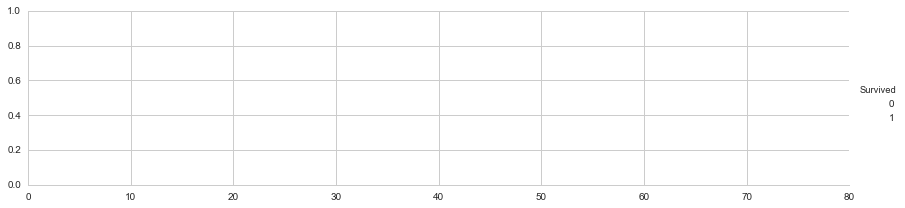

In [20]:
## Let's make a couple nice plots of survival vs age
# peaks for survived/not survived passengers by their age

facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
#facet.map(sns.kdeplot,'Age',shade= True) # This keeps crashing the kernal, but I don't know why!!!!!!!!!!
facet.set(xlim=(0, train_df['Age'].astype(int).max()))
facet.add_legend()


max:  80
min:  0


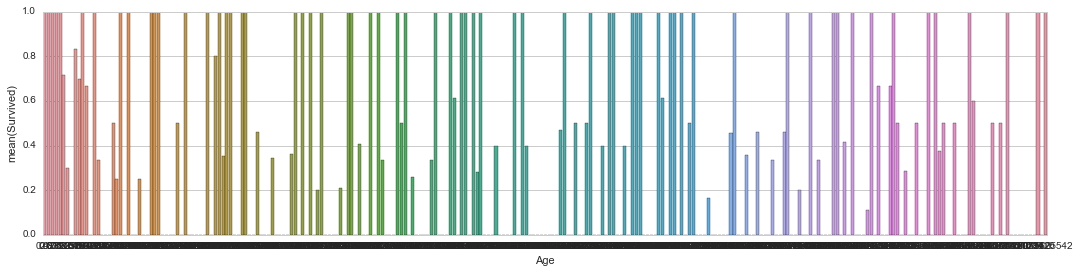

In [21]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)
print 'max: ',train_df['Age'].astype(int).max()
print 'min: ',train_df['Age'].astype(int).min()

In [22]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
train_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


/home/kmede/miniconda2/envs/ExoSOFTcondaEnv/lib/python2.7/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


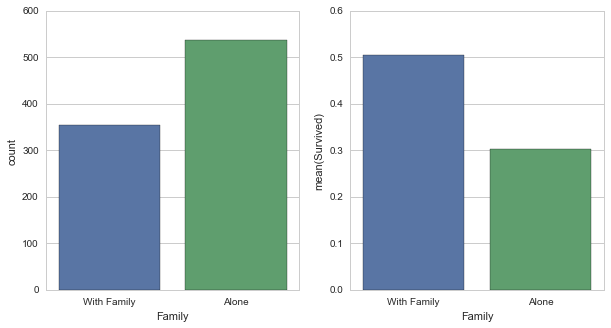

In [24]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=train_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

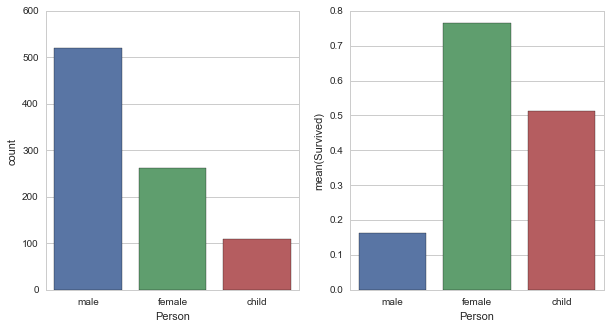

In [25]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(train_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train_df = train_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=train_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=train_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

## Not surprising, woman and children had higher survival rates.

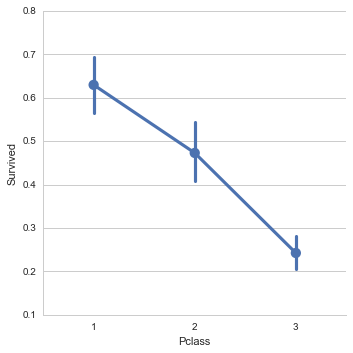

In [26]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(train_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

## Also unsurprising.  The higher the booking class, then higher the chances to survive.

___
___
___

# Now lets get to actually training and building a model to make predictions with!
___
___
___

## problems with the raw data
- a couple NaNs in 'Embarked', so drop column
- 'Name' strings can't be converted to anything useful, so drop column
- replace NaNs in 'Fare' with median
- 'Ticket' can't be converted to anything useful, so drop column
- 'PassengerID' has no importance, so drop column

In [27]:
#train_df.drop(['Embarked'], axis=1,inplace=True)
#test_df.drop(['Embarked'], axis=1,inplace=True)
# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
train_df.drop(['Name'], axis=1,inplace=True)
test_df.drop(['Name'], axis=1,inplace=True)

In [28]:
train_df.drop(['Ticket'], axis=1,inplace=True)
test_df.drop(['Ticket'], axis=1,inplace=True)

In [29]:
train_df.drop(['PassengerId'], axis=1,inplace=True)
#test_df.drop(['PassengerId'], axis=1,inplace=True)

In [30]:
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
train_df["Embarked"] = train_df["Embarked"].fillna("S")
# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_train  = pd.get_dummies(train_df['Embarked'])
#embark_dummies_train.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
#embark_dummies_test.drop(['S'], axis=1, inplace=True)

train_df = train_df.join(embark_dummies_train)
test_df    = test_df.join(embark_dummies_test)

train_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

# The names are also pointless, so drop them too

In [31]:
train_df.head()

,Survived,Age,Fare,Family,Child,Female,Class_1,Class_2,C,Q,S
0,0,22.0,7.2500,1,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,1,1,0,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,0,1
3,1,35.0,53.1000,1,0,1,1,0,0,0,1
4,0,35.0,8.0500,0,0,0,0,0,0,0,1


In [32]:
test_df.head()

,PassengerId,Age,Fare,Family,Child,Female,Class_1,Class_2,C,Q,S
0,892,34.5,7.8292,0,0,0,0,0,0,1,0
1,893,47.0,7.0000,1,0,1,0,0,0,0,1
2,894,62.0,9.6875,0,0,0,0,1,0,1,0
3,895,27.0,8.6625,0,0,0,0,0,0,0,1
4,896,22.0,12.2875,1,0,1,0,0,0,0,1


In [33]:
print '\nFor train_df:'
for column in train_df:
    print "# Nans in column '"+column+"' are: "+str(train_df[column].isnull().sum())
    print 'min: ',train_df[column].min()
    print 'max: ',train_df[column].max()
    
print '\nFor test_df:'
for column in test_df:
    print "# Nans in column '"+column+"' are: "+str(test_df[column].isnull().sum())
    print 'min: ',test_df[column].min()
    print 'max: ',test_df[column].max()   


For train_df:
# Nans in column 'Survived' are: 0
min:  0
max:  1
# Nans in column 'Age' are: 0
min:  0.42
max:  80.0
# Nans in column 'Fare' are: 0
min:  0.0
max:  512.3292
# Nans in column 'Family' are: 0
min:  0
max:  1
# Nans in column 'Child' are: 0
min:  0
max:  1
# Nans in column 'Female' are: 0
min:  0
max:  1
# Nans in column 'Class_1' are: 0
min:  0
max:  1
# Nans in column 'Class_2' are: 0
min:  0
max:  1
# Nans in column 'C' are: 0
min:  0
max:  1
# Nans in column 'Q' are: 0
min:  0
max:  1
# Nans in column 'S' are: 0
min:  0
max:  1

For test_df:
# Nans in column 'PassengerId' are: 0
min:  892
max:  1309
# Nans in column 'Age' are: 0
min:  0.17
max:  76.0
# Nans in column 'Fare' are: 0
min:  0.0
max:  512.3292
# Nans in column 'Family' are: 0
min:  0
max:  1
# Nans in column 'Child' are: 0
min:  0
max:  1
# Nans in column 'Female' are: 0
min:  0
max:  1
# Nans in column 'Class_1' are: 0
min:  0
max:  1
# Nans in column 'Class_2' are: 0
min:  0
max:  1
# Nans in column 'C' 

In [34]:
# define training and testing sets

X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [35]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.81144781144781142

In [36]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.98877665544332216

In [37]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.024006
1,Fare,0.000820
2,Family,-0.081796
3,Child,1.416860
4,Female,2.751139
5,Class_1,1.968250
6,Class_2,1.109379
7,C,-0.065954
8,Q,-0.310635
9,S,-0.692617


In [38]:
if False:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)